In [1]:
from PIL import Image

import pytesseract

pytesseract.pytesseract.tesseract_cmd =r'D:\Jupyter Notebooks\All Notebooks\tesseract-ocr.exe'
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [14]:
txt=pytesseract.image_to_string(Image.open('Page_1.jpg'),lang = 'eng')
txt

'Bromley\nBromley\nCallahan\nCoghill\nCornhill\nFarnham\nFarnham\nFinchley\nFuller\nGillingham\nGloucester\nRayleigh\nGrand Total\n\nUSA\n\n2011\nSalesperson Country| Units Order Amt\n\n24,756.89\n7,553.95\n49,400.07\n4,029.25\n120,626.31\n14,055.87\n\n89,663.20\n95,850.36\n71,168.14\n40,826.37\n31,433.16\n59,827.19\n609,190.76\n\n2012\nOrder Amt\n\n40,396.64\n3,654.00\n43,263.95\n4,657.11\n46,505.90\n5,892.65\n73,360.59\n55,787.97\n73,524.18\n17,181.58\n19,691.89\n41,903.64\n425,820.10\n\n2015\nUnits Order Amt\n\n9,894.51\n1,101.20\n18,059.50\n\n49,945.11\n2,560.40\n15,663.56\n30,861.76\n17,811.46\n14,519.68\n17,667.20\n15,232.16\n193,316.54\n\nUnits\n533\n92\n1,160\n120\n1,810\n231\n1422\n1488\nB75\n4g7\n821\n10,221\n\nTotal\n\nOrder Amt\n75,048.04\n12,309.15\n110,725.52\n£686.36\n217 077.32\n22,508.92\n178,687.35\n18? 500.09\n162,503.78\n72,527.63\n68,792 25\n116,962 99\n1,228,327,40\n\n'

In [15]:
txt=pytesseract.image_to_data(Image.open('Page_1.jpg'),lang = 'eng')

In [16]:
print(txt)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2893	4094	-1	
2	1	1	0	0	0	34	1620	293	1038	-1	
3	1	1	1	0	0	34	1620	293	1038	-1	
4	1	1	1	1	0	39	1620	215	49	-1	
5	1	1	1	1	1	39	1620	215	49	88.967476	Bromley
4	1	1	1	2	0	39	1703	214	49	-1	
5	1	1	1	2	1	39	1703	214	49	92.240311	Bromley
4	1	1	1	3	0	34	1786	235	40	-1	
5	1	1	1	3	1	34	1786	235	40	95.469452	Callahan
4	1	1	1	4	0	34	1870	181	49	-1	
5	1	1	1	4	1	34	1870	181	49	88.425728	Coghill
4	1	1	1	5	0	34	1953	181	49	-1	
5	1	1	1	5	1	34	1953	181	49	0.000000	Cornhill
4	1	1	1	6	0	39	2036	225	39	-1	
5	1	1	1	6	1	39	2036	225	39	94.831940	Farnham
4	1	1	1	7	0	39	2119	225	40	-1	
5	1	1	1	7	1	39	2119	225	40	95.695328	Farnham
4	1	1	1	8	0	39	2203	215	49	-1	
5	1	1	1	8	1	39	2203	215	49	95.619362	Finchley
4	1	1	1	9	0	39	2286	151	39	-1	
5	1	1	1	9	1	39	2286	151	39	96.643738	Fuller
4	1	1	1	10	0	34	2369	293	49	-1	
5	1	1	1	10	1	34	2369	293	49	95.774742	Gillingham
4	1	1	1	11	0	34	2453	289	39	-1	
5	1	1	1	11	1	34	2453	28

In [17]:
with open('data.txt','w') as f:
    f.write(txt)

In [18]:
d = pd.read_csv("data.txt", sep="\t")

In [21]:
d=d.sort_values(by='top')

In [29]:
d[d['top']==1453]

(16, 12)

In [28]:
d[d['top']==1537].shape

(22, 12)

In [30]:
mydata=[]
for i in d['top'].unique().tolist():
    txt=d[d['top']==i].sort_values(by='left')['text'].values.tolist()
    mydata.append(txt)

In [32]:
print(mydata)

[[nan], [nan, nan, '2011', nan, nan, nan, nan, '2012', nan, nan, nan, '2015', nan, nan, nan, 'Total'], ['Salesperson', nan, 'Country|', 'Units', 'Order', 'Amt', 'Order', nan, 'Amt', nan, 'Units', 'Order', 'Amt', nan, nan, 'Units', nan, nan, nan, 'Order', nan, 'Amt'], [nan, nan, nan, ' '], [nan, nan, nan, 'Bromley', nan, nan, '24,756.89', nan, nan, nan, '40,396.64', nan, nan, nan, '9,894.51', nan, nan, '533', nan, '75,048.04'], ['Bromley', nan, nan, '7,553.95', '3,654.00', nan, nan, '1,101.20', '92', nan, '12,309.15', nan], ['Callahan', nan, '49,400.07', nan, '43,263.95', nan, '18,059.50', nan, nan, '1,160', nan, '110,725.52'], ['Coghill', nan, '4,029.25', nan, '4,657.11', nan, nan, '120', nan, '�686.36'], ['077.32'], [nan, 'Cornhill', nan, nan, nan, 'USA', '120,626.31', nan, nan, '46,505.90', nan, nan, nan, '49,945.11', '1,810', nan, nan, '217'], ['Farnham', nan, '14,055.87', nan, nan, '5,892.65', '2,560.40', nan, '231', nan, '22,508.92', nan], ['Farnham', nan, nan, nan, '89,663.20', n

In [35]:
print(mydata[4])

[nan, nan, nan, 'Bromley', nan, nan, '24,756.89', nan, nan, nan, '40,396.64', nan, nan, nan, '9,894.51', nan, nan, '533', nan, '75,048.04']


In [36]:
print(mydata[5])

['Bromley', nan, nan, '7,553.95', '3,654.00', nan, nan, '1,101.20', '92', nan, '12,309.15', nan]


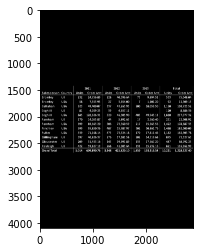

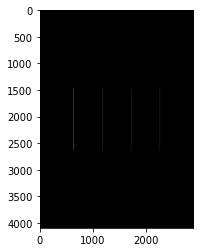

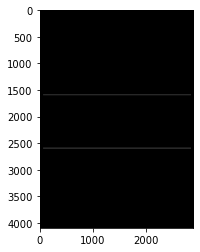

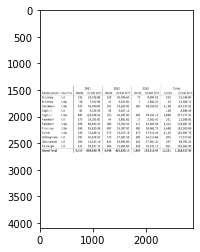

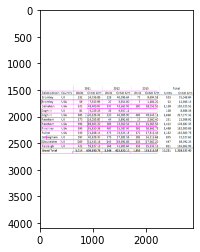

In [54]:

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#read your file
file=r'Page_1.jpg'
img = cv2.imread(file,0)
img.shape

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('cv_inverted.png',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

# countcol(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        
plotting = plt.imshow(image,cmap='gray')
plt.show()



In [55]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0

#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
print(column)
print(row)



[]
[]


In [74]:
from PIL import Image, ImageOps
import subprocess, sys, os, glob

# minimum run of adjacent pixels to call something a line
H_THRESH = 300
V_THRESH = 300

def get_hlines(pix, w, h):
    """Get start/end pixels of lines containing horizontal runs of at least THRESH black pix"""
    hlines = []
    for y in range(h):
        x1, x2 = (None, None)
        black = 0
        run = 0
        for x in range(w):
            if pix[x,y] == (0,0,0):
                black = black + 1
                if not x1: x1 = x
                x2 = x
            else:
                if black > run:
                    run = black
                black = 0
        if run > H_THRESH:
            hlines.append((x1,y,x2,y))
    return hlines

def get_vlines(pix, w, h):
    """Get start/end pixels of lines containing vertical runs of at least THRESH black pix"""
    vlines = []
    for x in range(w):
        y1, y2 = (None,None)
        black = 0
        run = 0
        for y in range(h):
            if pix[x,y] == (0,0,0):
                black = black + 1
                if not y1: y1 = y
                y2 = y
            else:
                if black > run:
                    run = black
                black = 0
        if run > V_THRESH:
            vlines.append((x,y1,x,y2))
    return vlines

def get_cols(vlines):
    """Get top-left and bottom-right coordinates for each column from a list of vertical lines"""
    cols = []
    for i in range(1, len(vlines)):
        if vlines[i][0] - vlines[i-1][0] > 1:
            cols.append((vlines[i-1][0],vlines[i-1][1],vlines[i][2],vlines[i][3]))
    return cols

def get_rows(hlines):
    """Get top-left and bottom-right coordinates for each row from a list of vertical lines"""
    rows = []
    for i in range(1, len(hlines)):
        if hlines[i][1] - hlines[i-1][3] > 1:
            rows.append((hlines[i-1][0],hlines[i-1][1],hlines[i][2],hlines[i][3]))
    return rows          

def get_cells(rows, cols):
    """Get top-left and bottom-right coordinates for each cell usings row and column coordinates"""
    cells = {}
    for i, row in enumerate(rows):
        cells.setdefault(i, {})
        for j, col in enumerate(cols):
            x1 = col[0]
            y1 = row[1]
            x2 = col[2]
            y2 = row[3]
            cells[i][j] = (x1,y1,x2,y2)
    return cells

def ocr_cell(im, cells, x, y):
    """Return OCRed text from this cell"""
    fbase = "working/%d-%d" % (x, y)
    ftif = "%s.tif" % fbase
    ftxt = "%s.txt" % fbase
    cmd = "tesseract %s %s" % (ftif, fbase)
    # extract cell from whole image, grayscale (1-color channel), monochrome
    region = im.crop(cells[x][y])
    region = ImageOps.grayscale(region)
    region = region.point(lambda p: p > 200 and 255)
    # determine background color (most used color)
    histo = region.histogram()
    if histo[0] > histo[255]: bgcolor = 0
    else: bgcolor = 255
    # trim borders by finding top-left and bottom-right bg pixels
    pix = region.load()
    x1,y1 = 0,0
    x2,y2 = region.size
    x2,y2 = x2-1,y2-1
    while pix[x1,y1] != bgcolor:
        x1 += 1
        y1 += 1
    while pix[x2,y2] != bgcolor:
        x2 -= 1
        y2 -= 1
    # save as TIFF and extract text with Tesseract OCR
    trimmed = region.crop((x1,y1,x2,y2))
    trimmed.save(ftif, "TIFF")
    subprocess.call([cmd], shell=True, stderr=subprocess.PIPE)
    lines = [l.strip() for l in open(ftxt).readlines()]
    return lines[0]

def get_image_data(filename):
    """Extract textual data[rows][cols] from spreadsheet-like image file"""    
    im = Image.open(filename)
    pix = im.load()
    width, height = im.size
    hlines = get_hlines(pix, width, height)
    sys.stderr.write("%s: hlines: %d\n" % (filename, len(hlines)))
    vlines = get_vlines(pix, width, height)
    sys.stderr.write("%s: vlines: %d\n" % (filename, len(vlines)))
    rows = get_rows(hlines)
    sys.stderr.write("%s: rows: %d\n" % (filename, len(rows)))
    cols = get_cols(vlines)
    sys.stderr.write("%s: cols: %d\n" % (filename, len(cols)))
    cells = get_cells(rows, cols)
    
    data = []
    for row in range(len(rows)):
        data.append([ocr_cell(im,cells, row, col) for col in range(len(cols))]) 
    return data

def split_pdf(filename):
    """Split PDF into PNG pages, return filenames"""
    prefix = filename[:-4]
    cmd = "convert -density 600 %s working/%s-%%d.png" % (filename, prefix)
    subprocess.call([cmd], shell=True)
    return [f for f in glob.glob(os.path.join('working', '%s*' % prefix))]

def extract_pdf(filename):
    """Extract table data from pdf"""
    pngfiles = split_pdf(filename)
    print(pngfiles)
    sys.stderr.write("Pages: %d\n" % len(pngfiles))
    # extract table data from each page
    data = []
    for pngfile in pngfiles:
        pngdata = get_image_data(pngfile)
        for d in pngdata:
            data.append(d)
        # remove temp files for this page
        os.system("rm working/*.tif")
        os.system("rm working/*.txt")
    # remove split pages
    os.system("rm working/*")   
    return data

if __name__ == '__main__':
    
    filename = "1.pdf"
    data = extract_pdf(filename)
    print(data)
    for row in data:
        print("\t".join(row)) 

[]
[]


Pages: 0


In [72]:
row

[]

In [75]:
from ExtractTable import ExtractTable
YOUR_API_KEY="LtgNVml9zVQeK18uCh1MKeElWBcYQZPjRVrP4EAP"
et_sess = ExtractTable(api_key=YOUR_API_KEY)        # Replace your VALID API Key here
print(et_sess.check_usage())        # Checks the API Key validity as well as shows associated plan usage 
#table_data = et_sess.process_file(filepath=Location_of_Image_with_Tables, output_format="df")

# To process PDF, make use of pages ("1", "1,3-4", "all") params in the read_pdf function
table_data = et_sess.process_file(filepath="1.pdf", output_format="df", pages="all")

{'credits': 10, 'used': 0, 'queued': 0}


C:\ProgramData\Anaconda3\lib\site-packages\ExtractTable\parsers.py:43: UserWarning: Check the status using the JobId after 10 seconds
  warnings.warn(_msg_)


[Info]: Waiting to retrieve the output; JobId: 775e0800dd04b8f7583684f637ea3bb88b8bacbbb27bfc6a32ffe63250ded7c0


In [80]:
table_data[0]

,0,1,2,3,4,5,6,7,8,9
0,,,,2011,,2012,,2013,,Total
1,Salesperson,Country,Units,Order Amt,Units,Order Amt,Units,Order Amt,Units,Order Amt
2,Bromley,UK,232,"24,756.89",228,"40,396.64",73,"9,894.51",533,"75,048.04"
3,Bromley,USA,58,"7,553.95",27,"3,654.00",7,"1,101.20",92,"12,309.15"
4,Callahan,USA,623,"49,400.07",337,"43,263.95",200,"18,059.50","1,160","110,723.52"
5,Coghill,UK,81,"4,029.25",39,"4,657.11",,,120,"8,686.36"
6,Coghill,USA,885,"120,626.31",520,"46,505.90",405,"49,945.11","1,810","217,077.32"
7,Farnham,UK,170,"14,055.87",44,"5,892.65",17,"2,560.40",231,"22,508.92"
8,Farnham,USA,699,"89,663.20",506,"73,360.59",217,"15,663.56","1,422","178,687.35"
9,Finchley,USA,699,"95,850.36",487,"55,787.97",302,"30,861.76","1,488","182,500.09"


In [35]:
from pdf2image import convert_from_path

pdfs = "1.pdf"
pages = convert_from_path(pdfs, 350,poppler_path=r'D:\Jupyter Notebooks\All Notebooks\poppler-0.68.0\bin')

i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(image_name, "JPEG")
    i = i+1    

In [39]:
import cv2
from PIL import Image

def mark_region(image_path):
    
    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)

        if y >= 600 and x <= 1000:
            if area > 10000:
                image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
                line_items_coordinates.append([(x,y), (2200, y+h)])

        if y >= 2400 and x<= 2000:
            image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            line_items_coordinates.append([(x,y), (2200, y+h)])


    return image, line_items_coordinates


ee



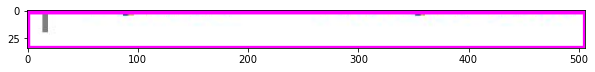

In [40]:
image = cv2.imread('Page_1.jpg')
image, line_items_coordinates = mark_region("Page_1.jpg")
# get co-ordinates to crop the image
c = line_items_coordinates[1]

# cropping image img = image[y0:y1, x0:x1]
img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

plt.figure(figsize=(10,10))
plt.imshow(img)

# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

In [42]:
import cv2 as cv
import numpy as np
filename = 'Page_1.jpg'
img = cv.imread(cv.samples.findFile(filename))
cImage = np.copy(img) #image to draw lines
cv.imshow("image", img) #name the window as "image"
cv.waitKey(0)
cv.destroyWindow("image") #close the windo

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'image' in function 'cvDestroyWindow'


In [43]:
minLineLength[, maxLineGap]]]) → lines
rho = 1
theta = np.pi/180
threshold = 50
minLinLength = 350
maxLineGap = 6
linesP = cv.HoughLinesP(canny, rho , theta, threshold, None, minLinLength, maxLineGap)

SyntaxError: invalid syntax (<ipython-input-43-6046e1766d21>, line 1)